In [1]:
import os
import pandas as pd
import scipy.spatial as spatial

In [69]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings("ignore")

In [8]:
show_averages = pd.read_csv('../output/show_averages.csv')

In [9]:
show_averages.head()

acousticness  danceability    energy          host  instrumentalness  \
0      0.397903      0.593984  0.612476  100-elements          0.143169   
1      0.411760      0.568864  0.477757    150session          0.506222   
2      0.222235      0.649801  0.616469         239ef          0.651471   
3      0.125524      0.628543  0.734706           404          0.490622   
4      0.241618      0.543225  0.644732   80srampwalk          0.399130   

        key  liveness   loudness      mode  speechiness       tempo   valence  
0  5.325365  0.248400  -9.030980  0.585152     0.232456  105.198983  0.550846  
1  5.308251  0.181875 -13.244073  0.608438     0.082675  121.093263  0.419212  
2  5.836919  0.168529 -11.052283  0.545171     0.084075  120.727100  0.394593  
3  5.783984  0.206325  -8.187795  0.607497     0.127118  128.200799  0.351460  
4  5.609361  0.191930 -10.484908  0.598856     0.071090  125.016547  0.486557

In [152]:
show_averages.dropna(inplace=True)
show_average_data = show_averages.drop('host', axis=1)
show_average_data = (show_average_data - show_average_data.mean()) / (show_average_data.max() - show_average_data.min())

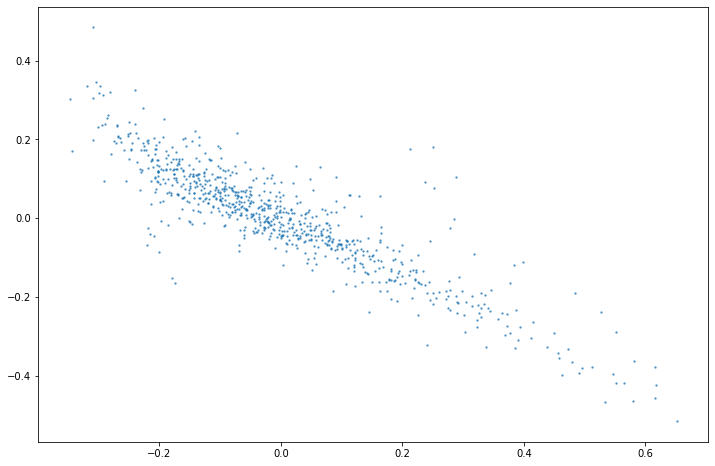

In [153]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(show_average_data['acousticness'], show_average_data['energy'], s=2, alpha=0.6)

In [173]:
kmeans_model = KMeans(n_clusters=100, max_iter=10000).fit(show_average_data)

In [174]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = show_averages.index.values
cluster_map['cluster'] = kmeans_model.labels_

for i in range(len(np.unique(kmeans_model.labels_))):
    print('\n New cluster...')
    indexes = cluster_map[cluster_map.cluster == i]['data_index']
    print(show_averages.loc[indexes]['host'])


 New cluster...
125        children-of-zeus
175          dexter-dukarus
198                    dawn
379              ksr-tarsza
470                   lambo
552               phambinho
610                 work-it
665                     son
718    the-kim-and-pia-show
723               meme-gold
Name: host, dtype: object

 New cluster...
17          aisha-devi
45          ARRHYTHMIA
86           bo-ningen
181           disjecta
252     francis-redman
290    halocine-trance
293       hassan-rahim
303    dream-catalogue
345        joaneskyler
359            kasra-v
425              lukid
499               node
534                pan
646      silvia-kastel
673                spa
699          team-sesh
725               pbdy
767                ttb
768                 tt
775        unthinkable
796    will-and-yousif
817               ZULI
Name: host, dtype: object

 New cluster...
68                     bergsonist
71                          masha
133                      circuits
165      

Name: host, dtype: object

 New cluster...
489    neoperreo-radio
Name: host, dtype: object

 New cluster...
13         advice-from-paradise
21                    aldous-rh
35              angel-bat-dawid
159    dactylian-and-palo-santo
298                   high-jazz
327    international-geographic
511                      ohbliv
542                patrickforge
617                      sameed
667                      sidibe
727           radio-free-numero
766                     mafalda
820               harriet-brown
Name: host, dtype: object

 New cluster...
47                       mi-ki-mak
79                  blood-and-fire
117                    casual-play
130                     chrispcuts
185                  dj-hoodrich-j
267                     pink-noise
396                            lbb
415                   lenard-smith
462                    mixed-fruit
486               narx-and-friends
577                       qendresa
578                     queen-kong
591         

In [155]:
ktree = KDTree(show_average_data, leaf_size=40, metric='minkowski')

In [156]:
artist = 'martha'
query_host = show_averages[show_averages['host']== artist].drop('host', axis=1)
(dist, ind) = ktree.query(query_host, k=4)

In [162]:
print(f'If you enjoyed "{artist}", we recommend:\n')
for i in range(len(dist[0])):
    host = show_averages.loc[ind[0][i]]['host']
    distance = dist[0][i]
    print(f'    "{host}" is a distance {distance} away.')

If you enjoyed "martha", we recommend:

    "dreams" is a distance 125.92692088939569 away.
    "we-are-not-alone" is a distance 125.95175722488646 away.
    "diy-space-for-london" is a distance 126.00246346518074 away.
    "high-bank" is a distance 126.08981303846286 away.
